## Perceptron

> The perceptron is the base unit of a neural network. It is a binary classification model capable of separating linearly two class of points. A perceptron is made of;
> - A linear function $z = w_{1}x_{1}+...+w_{n}x_{n} + b$ where the $w_i$ are the weights of the entries and b is the bias
> - An activation function $a(z)$
> - And an output $y_{pred}$
    
Suppose we want to distinguish between toxic and non toxic plants of a specie. We will measure the length and width of it's petals. These measurements are then stored in variables $x_1$ and $x_2$. By passing these data into a perceptron, We want to create a Model that will efficiently separate the toxic plants from the non toxic ones. We will need;

- **A dataset** : Made of $X$ the Sample and $y$ the target
- **A model function** :  $z$ and activation function (Sigmoid in this case) $a(z) = \dfrac{1}{1 + e^{-z}}$ this will give us a probability following the Bernoulli distribution
- **A cost function** : How well is our model performing ? 
- **The gradient function** : To adjust the weights and bias so as to minimise the cost function
- **An update function** : To update the weights and bias returned by the gradients function

In [2]:
import numpy as np #Numerical Python for fast and vector computations
import matplotlib.pyplot as plt #Making graphics and plots
from matplotlib.animation import FuncAnimation,FFMpegWriter #plot Animations
import matplotlib.animation as animation #plot animations
from sklearn.metrics import accuracy_score #Acuuracy score metrics from sklearn
from sklearn.datasets import make_blobs #Generating random datasets

In [3]:
class Perceptron:
    #initialise the weights and bias
    def __init__(self,X,y,alpha=0.1,n_iter=1000):
        self.X = X
        self.y = y
        #Initialise the weights
        self.W = None
        #Initialise the bias of our model
        self.b = None
        #The parameter history of our percptron model
        self.History = {'Weight_History':[],
                        'Bias_History': [],
                        'Loss_History':[],
                        'Index':[]
                       }
        self.head_features = lambda i: print(f"{self.X[:i]}\n")
        self.head_target = lambda i: print(f"{self.y[:i]}\n")
        self.AnimateParameters = [] #This variable stores the parameters to be used for the animation
        self.alpha = alpha
        self.n_iter = n_iter
        
    #Print the details of the entered dataset
    def details(self):
        b = self.b
        W = self.W
        print("\tDATASET DETAILS\n")
        print(f"Feature size: {self.X.shape}\nTarget size: {self.y.shape}\nInitial Weights: {W}\nInitial bias: {b}\n")
        #Plot and visualise the dataset
        plt.title("Dataset")
        plt.scatter(self.X[:,0],self.X[:,1],c=y,cmap='summer')
        plt.show()
        
    #Create the model   
    def Model(self,X,W,b):
        Z = (X).dot(W) + b
        A = 1/(1+np.exp(-Z))
        return A
    
    #Evaluate the cost of the model
    def Cost_function(self,A):
        cost = (-1/((self.X).shape[0]))*(np.sum(self.y*np.log(A) + (1-self.y)*np.log(1-A)))
        return cost
    
    #Calculate the derviatives of the cost function with resoect to the Weights and bias
    def Gradients(self,A):
        dW = (-1/(self.X.shape[0]))*(X.T).dot(y-A)
        db = (-1/(self.X.shape[0]))*np.sum(y-A)
        return (dW,db)
    
    #Adjust the parameters weights and bias
    def Update(self,dW,db):
        self.W = self.W - self.alpha*dW
        self.b = self.b - self.alpha*db
        return (self.W,self.b) 
    
    #Fit or train the Model
    def fit(self):
        #Initialise the weights
        self.W = np.random.randn(self.X.shape[-1],1)
        #Initialise the bias of our model
        self.b = np.random.randn(1)
        for i in range(self.n_iter):
            A = self.Model(self.X,self.W,self.b)
            L = self.Cost_function(A)
            dW,db = self.Gradients(A)
            self.W,self.b = self.Update(dW,db)
            self.History['Weight_History'].append(self.W)
            self.History['Bias_History'].append(self.b)
            self.History['Loss_History'].append(L)
            self.History['Index'].append(i)
            self.AnimateParameters.append([self.W,self.b,self.History['Loss_History'][:i+1],i])
        #Return the parameters for later use like animations    
        return self.AnimateParameters
    
    #Use the sklearn metric to evaluate the model performance
    def Train_Report(self):
        return accuracy_score(self.y,self.Predict(self.X))
    
    #Print the learning curve
    def Learning_curve(self):
        if not len(self.History['Loss_History']):
            print("Train the model before attempting to plot the learning curve!")
            return None
        else:
            plt.plot(self.History['Loss_History'],color='green')
            plt.show()

    #Plot the final state plots for the decision line, sigmoid function and the cost function ( Learning curve )     
    def Final_plots(self):
        W = self.History['Weight_History']
        b = self.History['Bias_History']
        loss = self.History['Loss_History']
        i = self.History['Index']
        X = self.X
        y = self.y
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        ax[0].clear() #Decision Line
        ax[1].clear() #Sigmoid actvation function
        ax[2].clear() #Cost function
        s = 300
        ax[0].scatter(X[:,0],X[:,1],c=y,s=s,cmap='summer',edgecolors='k',linewidths=3)
        xlim = ax[0].get_xlim()
        ylim = ax[0].get_ylim()
        x1 = np.linspace(-3,6,100)
        #x2 = (-Model1.W[0]*x1 - Model1.b)/Model1.W[1]
        x2 = (-W[-1][0]*x1 - b[-1])/W[-1][1]
        ax[0].plot(x1,x2,c='orange',lw=4)
        ax[0].set_xlim(X[:,0].min(),X[:,0].max())
        ax[0].set_ylim(X[:,1].min(),X[:,1].max())
        ax[0].set_title('Decision Line')
        ax[0].set_xlabel('x1')
        ax[0].set_ylabel('x2')
        #Sigmoid activation function
        Z = X.dot(W[-1]) + b[-1]
        Z_new = np.linspace(Z.min(),Z.max(),100)
        A = 1/(1+np.exp(-Z_new))
        ax[1].plot(Z_new,A,c='orange',lw=4)
        ax[1].scatter(Z[y==0],np.zeros(Z[y==0].shape),c='#008066',edgecolors='k',linewidths=3,s=s)
        ax[1].scatter(Z[y==1],np.ones(Z[y==1].shape),c='#ffff66',edgecolors='k',linewidths=3,s=s)
        ax[1].set_xlim(Z.min(),Z.max())
        ax[1].set_title('Sigmoid activation function')
        ax[1].set_xlabel('Z')
        ax[1].set_ylabel('A(Z)')
        for j in range(len(A[y.flatten()==0])):
            ax[1].vlines(Z[y==0][j],ymin=0,ymax=1/(1+np.exp(-Z[y==0][j])),color='red',alpha=0.4,zorder=-1)
        for j in range(len(A[y.flatten()==1])):
            ax[1].vlines(Z[y==1][j],ymax=1,ymin=1/(1+np.exp(-Z[y==1][j])),color='red',alpha=0.4,zorder=-1) 
        #Cost function
        ax[2].plot(i,loss,color='red',lw=4)
        ax[2].set_xlim(-20,len(loss))
        ax[2].set_ylim(0,loss[0]*1.1)
        ax[2].set_title("Cost function")
        ax[2].set_xlabel('Iteration Number')
            
    #Predict for new entry
    def Predict(self,New):
        y_pred = self.Model(New,self.W,self.b)
        return y_pred>=0.5

In [4]:
#Create the dataset
X,y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)

In [5]:
#Check the shapes
print(f"Shape X : {X.shape}\nShape y : {y.shape}")

Shape X : (100, 2)
Shape y : (100,)


In [6]:
#Ajust the shape for y
y = y.reshape(-1,1)
y.shape

(100, 1)

In [7]:
#Create an object of our perceptron class with that data
Model1 = Perceptron(X,y,0.1,1000)

> Note that our **`perceptron class`** should work for all datasizes and independent of the number of features they have.  In what follows, we will test our perceptron on data with only two features. 


[[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]

[[1]
 [1]
 [0]
 [0]
 [1]]

	DATASET DETAILS

Feature size: (100, 2)
Target size: (100, 1)
Initial Weights: None
Initial bias: None



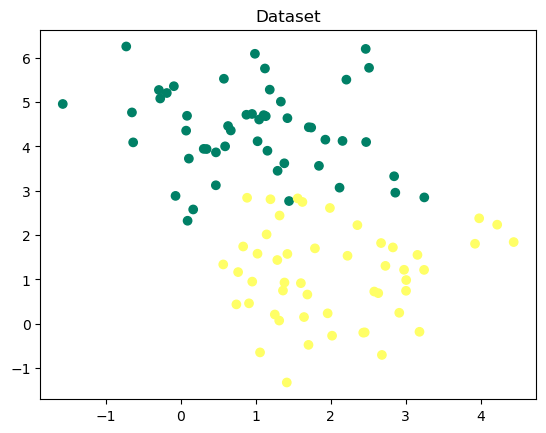

In [8]:
#Head first five feature values
Model1.head_features(5)

#Head first five target values
Model1.head_target(5)

#Print the details of the data
Model1.details()

In [9]:
#Fit the model and keep the parameters for our animation
params = Model1.fit()

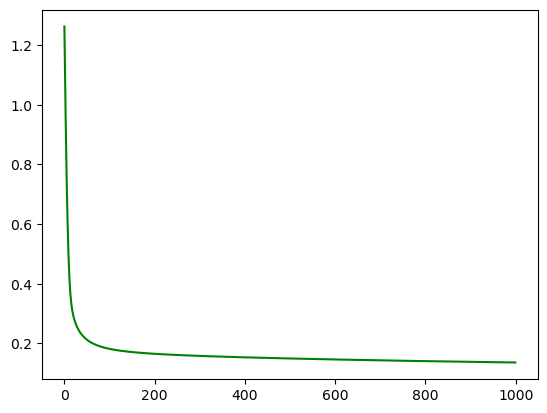

In [94]:
#Plot the Cost function evolution or the learning curve
Model1.Learning_curve()

In [95]:
#The accuracy of our model on the training set based on the parameters it found
Model1.Train_Report()

0.94

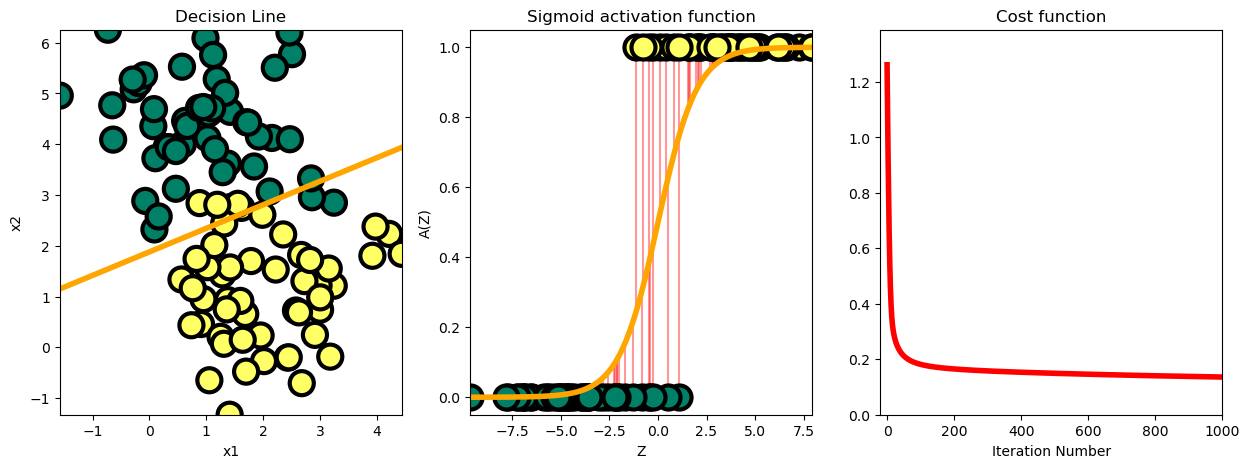

In [98]:
#Plot the final decision line, the fitted logistic curve and the learning curve
Model1.Final_plots()

Now that our Model has learned, Consider we want to predict a new point of coordinate $(2,0)$ and see if our model will effectively predict the class to which it belongs. Let's plot the point together with the dataset to visualise it together with the decision line

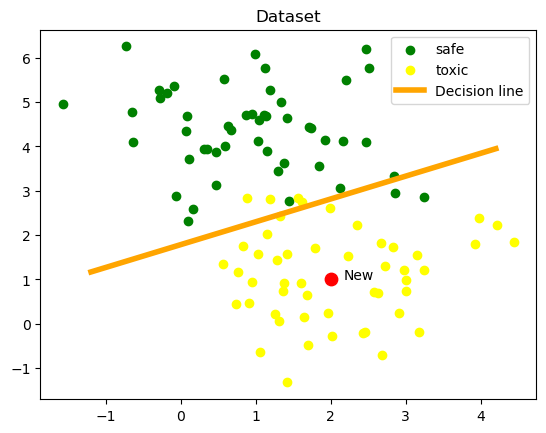

In [10]:
# Label the green points as "safe" and the yellow points as "toxic"
labels = ['safe' if label == 0 else 'toxic' for label in y]

# Plot and visualize the dataset
plt.title("Dataset")

# Plot green points with legend entry
green_points = plt.scatter(X[y.ravel() == 0, 0], X[y.ravel() == 0, 1], color='green', label='safe')

# Plot yellow points with legend entry
yellow_points = plt.scatter(X[y.ravel() == 1, 0], X[y.ravel() == 1, 1], color='yellow', label='toxic')

# Plot the new point (2, 0) as a red dot with label "new point"
new_point = (2, 1)
# Add the new point with a bigger size
plt.scatter(new_point[0], new_point[1], color='red', s=80)
plt.annotate('New', new_point, textcoords="offset points", xytext=(20, 0), ha='center')

# Draw the final decision line using the final model parameters w and b
x1 = np.linspace(-1.2, 4.2, 100)
x2 = (-Model1.W[0] * x1 - Model1.b) / Model1.W[1]
plt.plot(x1, x2, c='orange', lw=4, label="Decision line")

plt.legend()
plt.show()


In [11]:
#Make a prediction on the new point using our perceptron

New_point = np.array([2,1])
Prediction = Model1.Predict(New_point)
if Prediction:
    print("The plant is toxic")
else:
    print("The plant is safe")

#Note
    # - True --> Toxic plant in the yellow zone, not safe
    # - False --> Non toxic in the green zone

The plant is toxic


In [12]:
#Create a function to display the state of the curves at any iteration
def State(i):
    param = params[i]
    W = param[0]
    b = param[1]
    loss = param[2]
    iteration = param[3]
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(7,15))
    ax[0].clear() #Decision Line
    ax[1].clear() #Sigmoid actvation function
    ax[2].clear() #Cost function
    s = 300
    #Decision line
    ax[0].scatter(X[:,0],X[:,1],c=y,s=s,cmap='summer',edgecolors='k',linewidths=3)
    xlim = ax[0].get_xlim()
    ylim = ax[0].get_ylim()
    x1 = np.linspace(-3,6,100)
    #x2 = (-Model1.W[0]*x1 - Model1.b)/Model1.W[1]
    x2 = (-W[0]*x1 - b)/W[1]
    ax[0].plot(x1,x2,c='orange',lw=4)
    ax[0].set_xlim(X[:,0].min(),X[:,0].max())
    ax[0].set_ylim(X[:,1].min(),X[:,1].max())
    ax[0].set_title('Decision Line')
    ax[0].set_xlabel('x1')
    ax[0].set_ylabel('x2')
    #Sigmoid activation function
    Z = X.dot(W) + b
    Z_new = np.linspace(Z.min(),Z.max(),100)
    A = 1/(1+np.exp(-Z_new))
    ax[1].plot(Z_new,A,c='orange',lw=4)
    ax[1].scatter(Z[y==0],np.zeros(Z[y==0].shape),c='#008066',edgecolors='k',linewidths=3,s=s)
    ax[1].scatter(Z[y==1],np.ones(Z[y==1].shape),c='#ffff66',edgecolors='k',linewidths=3,s=s)
    ax[1].set_xlim(Z.min(),Z.max())
    ax[1].set_title('Sigmoid activation function')
    ax[1].set_xlabel('Z')
    ax[1].set_ylabel('A(Z)')
    for j in range(len(A[y.flatten()==0])):
        ax[1].vlines(Z[y==0][j],ymin=0,ymax=1/(1+np.exp(-Z[y==0][j])),color='red',alpha=0.4,zorder=-1)
    for j in range(len(A[y.flatten()==1])):
        ax[1].vlines(Z[y==1][j],ymax=1,ymin=1/(1+np.exp(-Z[y==1][j])),color='red',alpha=0.4,zorder=-1)    
    #Cost function
    ax[2].plot(range(iteration),loss[:iteration],color='red',lw=4)
    ax[2].set_xlim(-10,len(loss))
    ax[2].set_ylim(0,loss[0]*1.1)
    ax[2].set_title("Cost function")
    ax[2].set_xlabel('Iteration Number')

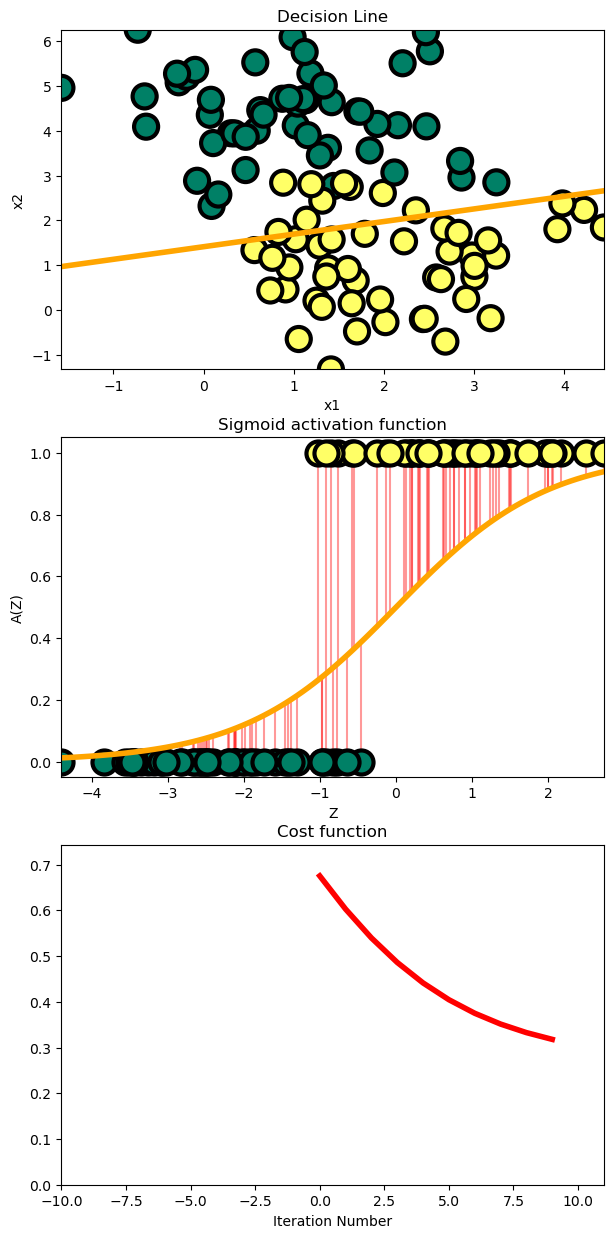

In [13]:
#Plot the curves states at the 10th iteration
State(10)

### Now let's animate our plot to see all the states at once

In [24]:
# Create the figure and subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(7, 15), squeeze=False)

#Create the animation function
def animate(i, axs):
    param = params[i]
    W = param[0]
    b = param[1]
    loss = param[2]
    iteration = param[3]
    axs[0, 0].clear()  # Decision Line
    axs[1, 0].clear()  # Sigmoid activation function
    axs[2, 0].clear()  # Cost function
    s = 300
    # Decision line
    axs[0, 0].scatter(X[:, 0], X[:, 1], c=y, s=s, cmap='summer', edgecolors='k', linewidths=3)
    xlim = axs[0, 0].get_xlim()
    ylim = axs[0, 0].get_ylim()
    x1 = np.linspace(-3, 6, 100)
    x2 = (-W[0] * x1 - b) / W[1]
    axs[0, 0].plot(x1, x2, c='orange', lw=4)
    axs[0, 0].set_xlim(X[:, 0].min(), X[:, 0].max())
    axs[0, 0].set_ylim(X[:, 1].min(), X[:, 1].max())
    axs[0, 0].set_title('Decision Line')
    axs[0, 0].set_xlabel('x1')
    axs[0, 0].set_ylabel('x2')
    # Sigmoid activation function
    Z = X.dot(W) + b
    Z_new = np.linspace(Z.min(), Z.max(), 100)
    A = 1 / (1 + np.exp(-Z_new))
    axs[1, 0].plot(Z_new, A, c='orange', lw=4)
    axs[1, 0].scatter(Z[y == 0], np.zeros(Z[y == 0].shape), c='#008066', edgecolors='k', linewidths=3, s=s)
    axs[1, 0].scatter(Z[y == 1], np.ones(Z[y == 1].shape), c='#ffff66', edgecolors='k', linewidths=3, s=s)
    axs[1, 0].set_xlim(Z.min(), Z.max())
    axs[1, 0].set_title('Sigmoid activation function')
    axs[1, 0].set_xlabel('Z')
    axs[1, 0].set_ylabel('A(Z)')
    for j in range(len(A[y.flatten() == 0])):
        axs[1, 0].vlines(Z[y == 0][j], ymin=0, ymax=1 / (1 + np.exp(-Z[y == 0][j])), color='red', alpha=0.4,
                         zorder=-1)
    for j in range(len(A[y.flatten() == 1])):
        axs[1, 0].vlines(Z[y == 1][j], ymax=1, ymin=1 / (1 + np.exp(-Z[y == 1][j])), color='red', alpha=0.4,
                         zorder=-1)
    # Cost function
    axs[2, 0].plot(range(iteration), loss[:iteration], color='red', lw=4)
    axs[2, 0].set_xlim(loss[-1]*0.8, len(loss))
    axs[2, 0].set_ylim(0, loss[0] * 1.1)
    axs[2, 0].set_title("Cost function")
    axs[2, 0].set_xlabel('Iteration Number')

# Create the animation
ani = FuncAnimation(fig, animate, frames=len(params), fargs=(axs,), interval=100000, repeat=False)
# Define the filename for the output video
output_filename = 'Perceptron Model Animation.mp4'
# Save the animation as an MP4 file
writer = FFMpegWriter(fps=60)
ani.save(output_filename, writer=writer)
# Close the figure
plt.close(fig)
# Print a message upon successful completion
print(f"Animation saved as {output_filename}")

Animation saved as Perceptron Model Animation.mp4


Now that our perceptron performs pretty well for this dataset, we are going to test it on something more trickier. 

### Cats and dogs

In [14]:
import h5py

train_dataset = h5py.File('cat_and_dogs_dataset/trainset.hdf5', "r")
X_train = np.array(train_dataset["X_train"][:]) # the train set features
y_train = np.array(train_dataset["Y_train"][:]) # the train set labels

test_dataset = h5py.File('cat_and_dogs_dataset/testset.hdf5', "r")
X_test = np.array(test_dataset["X_test"][:]) # the test set features
y_test = np.array(test_dataset["Y_test"][:]) # the test set labels

In [15]:
#View the size of our different sets 
print(X_train.shape)
print(y_train.shape)

#Unique values for predicates (Cats:0 and dogs:1)  and see the distribution
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


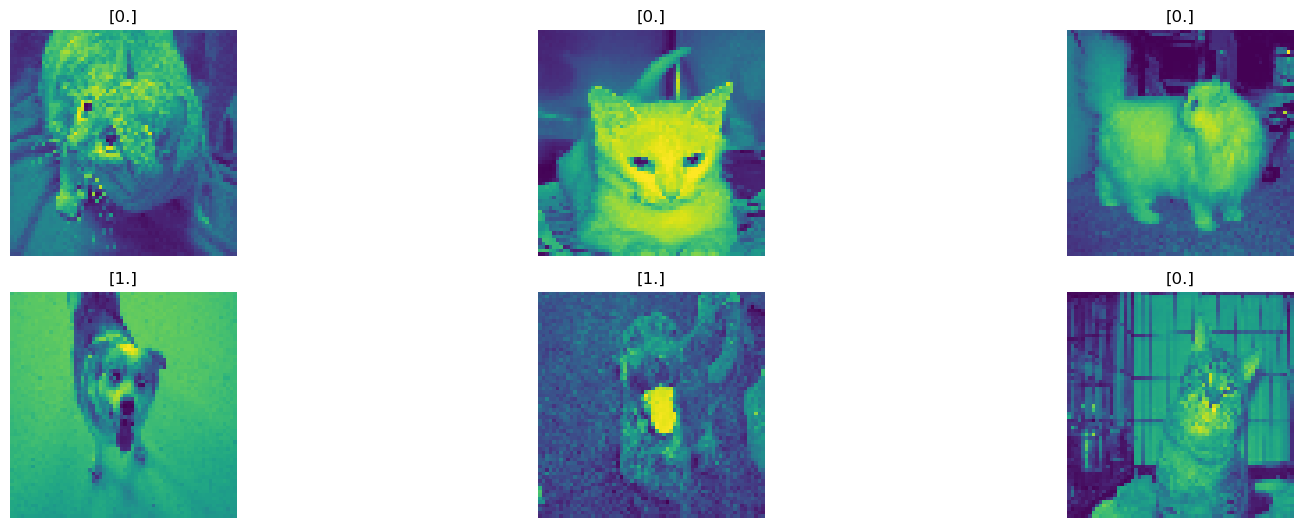

In [18]:
#Let's plot some of the pictures of the the train set and the corresponding output label
plt.figure(figsize=(16, 8))
for i in range(1, 7):
    plt.subplot(3, 3, i)
    plt.imshow(X_train[i]) 
    plt.title(y_train[i])
    plt.axis('off')  # Remove the axis labels

plt.tight_layout()
plt.show()